In [ ]:
# This is development code for obtaining 1D residuals from ADI images, so as to
# do the 2-sample KS test on them

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# generate some fake data

array_loaded = (1e-20)*np.ones((60,400))
array_loaded[15:45,50:350] = np.random.normal(size=(30,300))
array_loaded[15:45,180:220] = 3

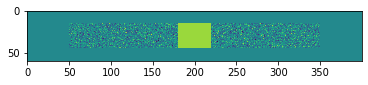

In [3]:
plt.imshow(array_loaded)
plt.show()

In [4]:
# input: a derotated array arranged so that E is on the left, W on the right

# remove ~zeros from consideration
array_relevant = np.copy(array_loaded)
array_relevant[np.abs(array_loaded)<1e-10] = np.nan

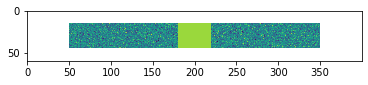

In [5]:
plt.imshow(array_relevant)
plt.show()

In [ ]:
# convolve with a smoothing function?

In [21]:
# set central point (note this is not necessarily a discrete pixel)

X,Y = np.meshgrid(np.arange(-0.5*np.shape(array_loaded)[1],0.5*np.shape(array_loaded)[1],1),
                  np.arange(-0.5*np.shape(array_loaded)[0],0.5*np.shape(array_loaded)[0],1))
X = np.add(X,0.5)
Y = np.add(Y,0.5)

# initialize arrays
radial_std_array_E = np.nan*np.ones(int(0.5*np.shape(array_loaded)[1]))
radial_median_array_E = np.copy(radial_std_array_E)
radial_max_array_E = np.copy(radial_std_array_E)
radial_std_array_W = np.copy(radial_std_array_E)
radial_median_array_W = np.copy(radial_std_array_E)
radial_max_array_W = np.copy(radial_std_array_E)

# outer mask based on radial distance
rad_thickness = 1

# loop over radii, one pixel at a time
# (boundary of 50 is slightly short of the radius of the long-baseline masks)
for rad_central in range(0,50):

    rad_inner = rad_central-0.5*rad_thickness
    rad_outer = rad_central+0.5*rad_thickness

    # select pixels
    mask_ring_bool = np.logical_and(np.power(X,2) + np.power(Y,2) <= np.power(rad_outer,2),
                            np.power(X,2) + np.power(Y,2) >= np.power(rad_inner,2))
    # cast boolean -> int
    mask_ring_int = 1*mask_ring_bool
    # cast zeros -> nans
    mask_ring_nans = np.copy(mask_ring_int).astype(float)
    mask_ring_nans[mask_ring_nans == 0] = np.nan
    
    # mask the array
    array_masked = np.multiply(array_relevant,mask_ring_nans)
    
    # chop into E (left) and W (right) halves
    # (note that the derotation should have been done beforehand)
    print("rad_central")
    print(rad_central)
    array_masked_E = array_masked[:,0:int(0.5*np.shape(array_loaded)[1])]
    array_masked_W = array_masked[:,int(0.5*np.shape(array_loaded)[1]):]
    
    # extract data
    stdev_E = np.nanstd(array_masked_E)
    stdev_W = np.nanstd(array_masked_W)
    median_E = np.nanmedian(array_masked_E)
    median_W = np.nanmedian(array_masked_W)
    max_E = np.nanmax(array_masked_E)
    max_W = np.nanmax(array_masked_W)
    
    # populate arrays
    radial_std_array_E[rad_central] = stdev_E
    radial_std_array_W[rad_central] = stdev_W
    radial_median_array_E[rad_central] = median_E
    radial_median_array_W[rad_central] = median_W
    radial_max_array_E[rad_central] = max_E
    radial_max_array_W[rad_central] = max_W

rad_central
0
rad_central
1
rad_central
2
rad_central
3
rad_central
4
rad_central
5
rad_central
6
rad_central
7
rad_central
8
rad_central
9
rad_central
10
rad_central
11
rad_central
12
rad_central
13
rad_central
14
rad_central
15
rad_central
16
rad_central
17
rad_central
18
rad_central
19
rad_central
20
rad_central
21
rad_central
22
rad_central
23
rad_central
24
rad_central
25
rad_central
26
rad_central
27
rad_central
28
rad_central
29
rad_central
30
rad_central
31
rad_central
32
rad_central
33
rad_central
34
rad_central
35
rad_central
36
rad_central
37
rad_central
38
rad_central
39
rad_central
40
rad_central
41
rad_central
42


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: All-NaN slice encountered
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


rad_central
43
rad_central
44
rad_central
45
rad_central
46
rad_central
47
rad_central
48
rad_central
49


In [36]:
# now in the form of a function

def return_residuals(array_loaded):
    '''
    INPUT: 
    array_loaded: a derotated array arranged so that E is on the left, W on the right
    
    OUTPUTS:
    radial_median_array_E: median of residuals of the eastern half-strip
    radial_median_array_W: " " " western half-strip
    '''
    
    # remove ~zeros from consideration
    array_relevant = np.copy(array_loaded)
    array_relevant[np.abs(array_loaded)<1e-10] = np.nan
    
    # convolve with a smoothing function? I've decided against it for now...
    
    # make grid to define center
    X,Y = np.meshgrid(np.arange(-0.5*np.shape(array_loaded)[1],0.5*np.shape(array_loaded)[1],1),
                  np.arange(-0.5*np.shape(array_loaded)[0],0.5*np.shape(array_loaded)[0],1))
    # remove centering error
    X = np.add(X,0.5)
    Y = np.add(Y,0.5)

    # initialize arrays to hold residuals
    arr_length = 50 # boundary of 50 is slightly short of the radius of the long-baseline masks
    radial_std_array_E = np.nan*np.ones(arr_length)
    radial_median_array_E = np.nan*np.ones(arr_length)
    radial_max_array_E = np.nan*np.ones(arr_length)
    radial_std_array_W = np.nan*np.ones(arr_length)
    radial_median_array_W = np.nan*np.ones(arr_length)
    radial_max_array_W = np.nan*np.ones(arr_length)

    # outer mask based on radial distance
    rad_thickness = 1

    # loop over radii, one pixel at a time
    # (boundary of 50 is slightly short of the radius of the long-baseline masks)
    for rad_central in range(0,arr_length):

        rad_inner = rad_central-0.5*rad_thickness
        rad_outer = rad_central+0.5*rad_thickness

        # select pixels
        mask_ring_bool = np.logical_and(np.power(X,2) + np.power(Y,2) <= np.power(rad_outer,2),
                            np.power(X,2) + np.power(Y,2) >= np.power(rad_inner,2))
        # cast boolean -> int
        mask_ring_int = 1*mask_ring_bool
        # cast zeros -> nans
        mask_ring_nans = np.copy(mask_ring_int).astype(float)
        mask_ring_nans[mask_ring_nans == 0] = np.nan
    
        # mask the array
        array_masked = np.multiply(array_relevant,mask_ring_nans)
    
        # chop into E (left) and W (right) halves
        # (note that the derotation should have been done beforehand)
        print("rad_central")
        print(rad_central)
        array_masked_E = array_masked[:,0:int(0.5*np.shape(array_loaded)[1])]
        array_masked_W = array_masked[:,int(0.5*np.shape(array_loaded)[1]):]
    
        # extract data
        stdev_E = np.nanstd(array_masked_E)
        stdev_W = np.nanstd(array_masked_W)
        median_E = np.nanmedian(array_masked_E)
        median_W = np.nanmedian(array_masked_W)
        max_E = np.nanmax(array_masked_E)
        max_W = np.nanmax(array_masked_W)
    
        # populate arrays
        # (note that they are both in r-space, such that r:0->inf is left->right;
        # no additional flipping is necessary)
        radial_std_array_E[rad_central] = stdev_E
        radial_std_array_W[rad_central] = stdev_W
        radial_median_array_E[rad_central] = median_E
        radial_median_array_W[rad_central] = median_W
        radial_max_array_E[rad_central] = max_E
        radial_max_array_W[rad_central] = max_W
        
    return radial_median_array_E, radial_median_array_W

In [37]:
test_E, test_W = comparison_residuals(array_loaded=array_loaded)

rad_central
0
rad_central
1
rad_central
2
rad_central
3
rad_central
4
rad_central
5
rad_central
6
rad_central
7
rad_central
8
rad_central
9
rad_central
10
rad_central
11
rad_central
12
rad_central
13
rad_central
14
rad_central
15
rad_central
16
rad_central
17
rad_central
18
rad_central
19
rad_central
20
rad_central
21
rad_central
22
rad_central
23
rad_central
24
rad_central
25
rad_central
26
rad_central
27
rad_central
28
rad_central
29
rad_central
30
rad_central
31
rad_central
32
rad_central
33
rad_central
34
rad_central
35
rad_central
36
rad_central
37
rad_central
38
rad_central
39
rad_central
40
rad_central
41
rad_central
42
rad_central
43
rad_central
44


/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: All-NaN slice encountered
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: All-NaN slice encountered


rad_central
45
rad_central
46
rad_central
47
rad_central
48
rad_central
49


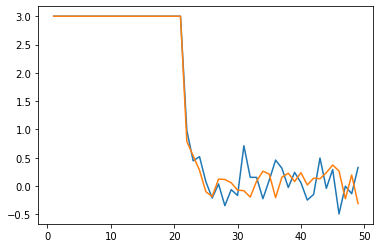

In [38]:
plt.plot(test_E)
plt.plot(test_W)

plt.show()

In [26]:
np.subtract(test_E,test_W)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0